## Project Setting

The purpose of this project is to predict wine quality rating based on exploration and analysis of wines from the Vinho Verde region of Portugal, on data from protected designation of origin wine samples collected from May 2004 to February 2007 and tested at the official Vinho Verde interprofessional certification entity (CVRVV).  

This will be done in Python, using different statistical tests, modelling and graphs.

## Executive Summary



## DATA ACQUISITION

- Data was originally obtained as two .cvs files (red wine, white wine) donated by the University of Minho, Portual, to UCI via Data.World.
- After combining the two .cvs files, the newly acquired dataframe represented 6497 rows and 13 columns.
- Each row represented a different red or white wine.
- Each column represented a different feature of the wine — the fixed acidity (g(tartaric acid)/ℓ), the volatile acidity  (g(_acetic acid_)/ℓ), the citric acid (g/ℓ), the residual sugar (g/ℓ), the chlorides (g(_sodium chloride_)/ℓ), the free sulphur dioxide (mg/ℓ), the total sulphur dioxide (mg/ℓ), the density (g/ℓ), the pH, the sulphates (g(_potassium sulphate_)/ℓ), the alcohol (% vol), the quality, the color.


## DATA PREPARATION

- To prepare the data, it was necessary to drop outliers and any unnecessary columns.
- The single categorical column was encoded, with a dummy variable being created. The dummy variable was then concatenated onto the prepared wine dataframe.
- There were no null values.
- Outliers, being a very small percentage in the overall dataset, were dropped according to the Inter Quartile Range (IQR).
- The chlorides column deemed irrelevant to this project and dropped. 
- Features specifically examined were 
    - (1) the relationship between free and total sulphur dioxide, 
    - (2) the levels of citric acid and residual sugar in the wine, 
    - (3) the density of the wine and 
    - (4) total residual sugar in and the density of the wine.
- These were analysed against the target variable of quality rating of the wine.

## Data Dictionary 

|Feature|              Definition|
| :------|:------|
|**fixed_acidity**|             - the acids naturally occuring in grapes (tartaric, malic, citric) or produced by 
| |yeast during fermentation (succinic)|
|**volatile_acidity**|          - measure of the wines gaseous (volatile) acids, the primary one being acetic 
| |                        acid, which is asociated with vinegar ; overall, pronounced volatile acidity 
| |                            is a negative characteristic|                              
|**citric_acid**|               - often added to post-fermentation wine to balance sugar levels and / or to 
| |                            create a sense of vibrancy |
|**rs**|                        - residual sugar : the amount of sugar remaining in the wine after fermentation|
|**chlorides**|                 - indication of the presence of sodium chloride (salinity) of a wine| 
|**free_s02**|                  - sulphur dioxide is an anti-oxidant (preservative) ; free sulphur dioxide is S02 
| |                                added to the wine that has not reacted with other chemical compounds in the 
| |                                wine ; too much added S02 will produce a sulphury smell in the wine|
|**total_s02**|                 - free and bound S02 ; bound S02 has combined with chemical compounds in the wine |
|**density**|                   - a description of the viscosity, related to alcohol, sugar, glycerol and other 
| |                                dissolved solids in the wine ;
| |                            - related to a wine's mouthfeel ; 
| |                            - specifically, 'the mass per unit volume of wine or must at 20°C. It is 
| |                             expressed in grams per milliliter, and denoted by the symbol ρ' (OIV) ; 
| |                            - alternately, a measurement of the sugar content of the grapes before fermentation
|**pH**|                        - a measure of the relative alkilinity vs the relative acidity of a wine ; usually 
| |                            between 3 and 4 pH ; typically, a wine with a high level of acidity will 
| |                            have a low pH level|
|**alcohol**|                   - percentage alcohol by volume in the finished wine|
|**quality (TARGET)**|          - rating / score between 0 and 10, with 10 being the best|

In [1]:
# imports

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from math import sqrt


from sklearn.linear_model import LinearRegression
from sklearn.linear_model import TweedieRegressor
from sklearn.linear_model import LassoLars

from scipy import stats
from scipy.stats import pearsonr, spearmanr

from sklearn.metrics import mean_squared_error, r2_score, explained_variance_score

from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import PolynomialFeatures

from sklearn.cluster import KMeans

from sklearn.feature_selection import SelectKBest, f_regression, RFE


from sklearn.tree import DecisionTreeClassifier, plot_tree
from sklearn.metrics import classification_report, confusion_matrix, plot_confusion_matrix

from sklearn.neighbors import KNeighborsClassifier

# import my functions
import prepare
import env
import prepare_xy_split
import selectKBest_rfe_functions
import functions
import wrangle

# turn off pink warning boxes
import warnings
warnings.filterwarnings("ignore")

%matplotlib inline


In [2]:
wine = wrangle.gimme_wine()

quality column ignored
color column ignored


In [3]:
wine.sample(5)

,fixed_acidity,volatile_acidity,citric_acid,rs,chlorides,free_s02,total_s02,density,pH,sulphates,alcohol,quality,color_white
4658,7.1,0.43,0.25,2.8,0.036,43.0,132.0,0.98975,3.21,0.47,13.4,6,1
664,7.1,0.17,0.38,7.4,0.052,49.0,182.0,0.99580,3.35,0.52,9.6,6,1
6108,6.8,0.65,0.02,2.1,0.078,8.0,15.0,0.99498,3.35,0.62,10.4,6,0
6299,7.9,0.69,0.21,2.1,0.080,33.0,141.0,0.99620,3.25,0.51,9.9,5,0
2333,6.8,0.37,0.28,1.9,0.024,64.0,106.0,0.98993,3.45,0.60,12.6,8,1


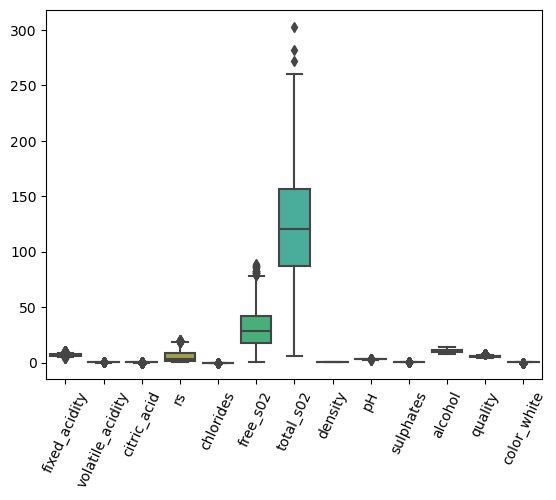

In [4]:
# looking for outliers

sns.boxplot(data = wine)
x = [0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12]
labels = wine.columns
plt.xticks(x, labels, rotation = 65)
plt.show()

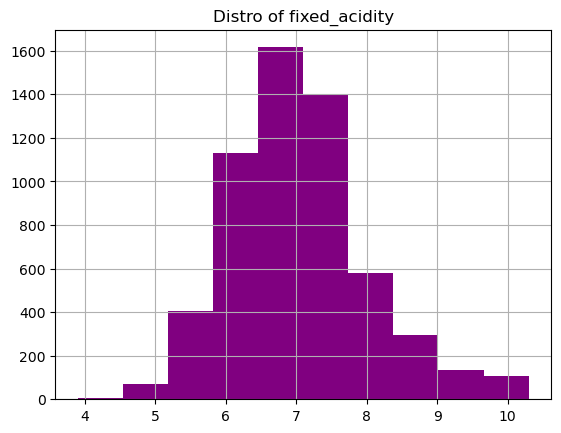

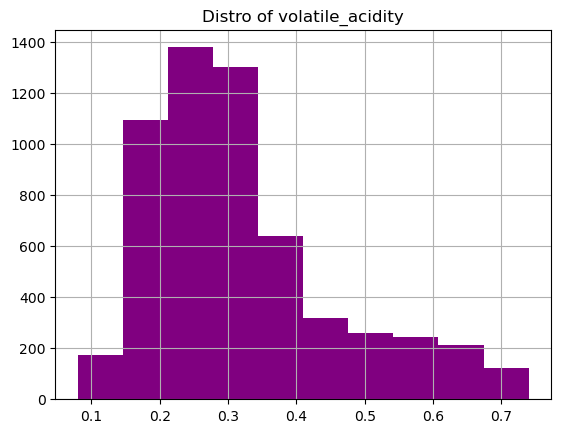

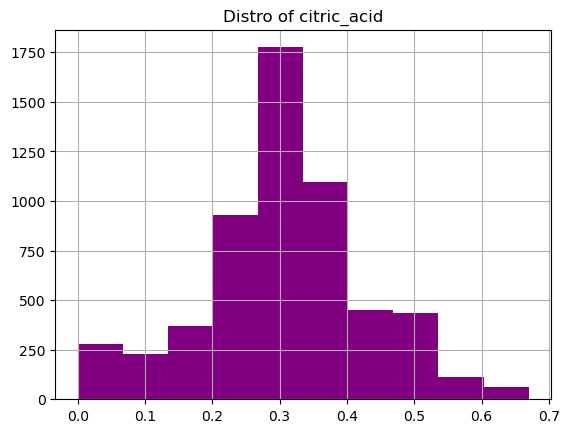

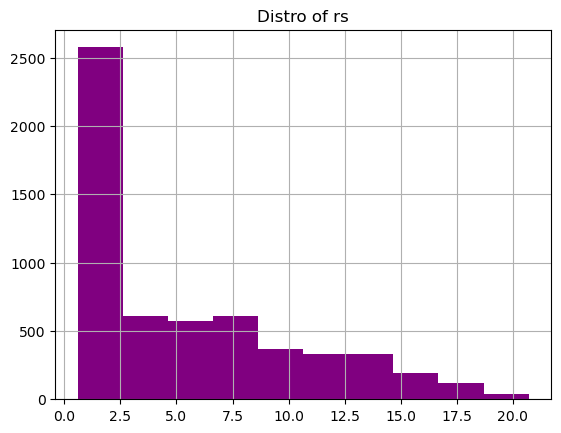

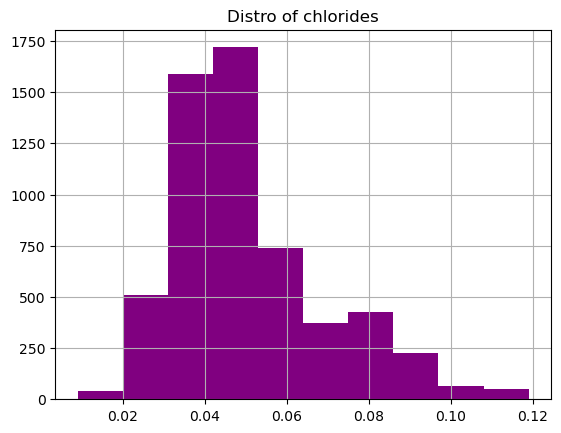

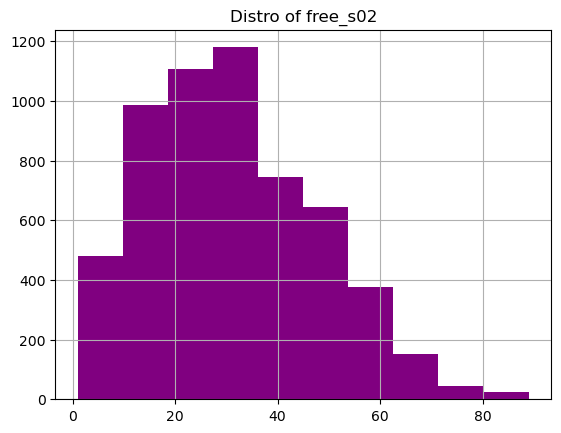

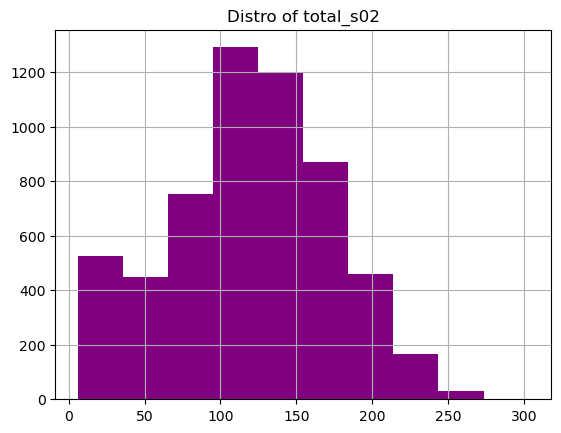

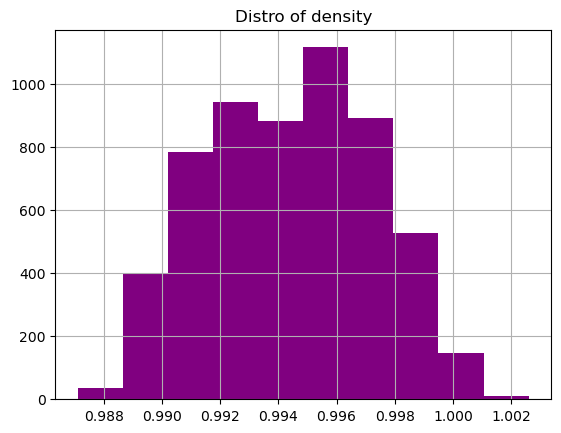

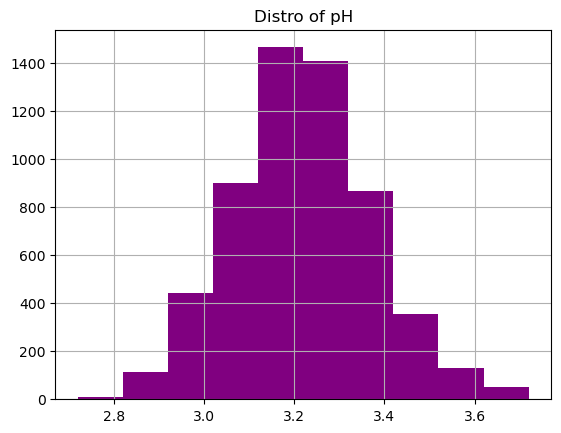

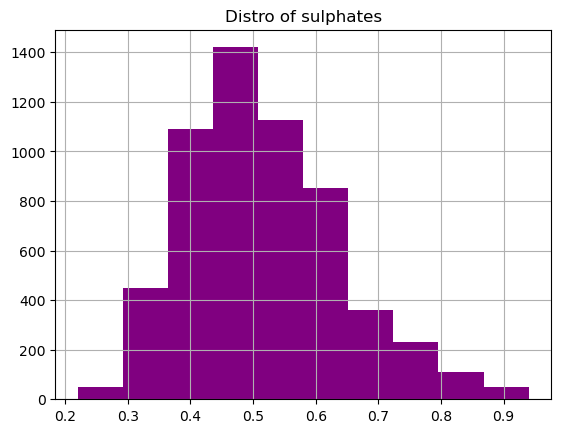

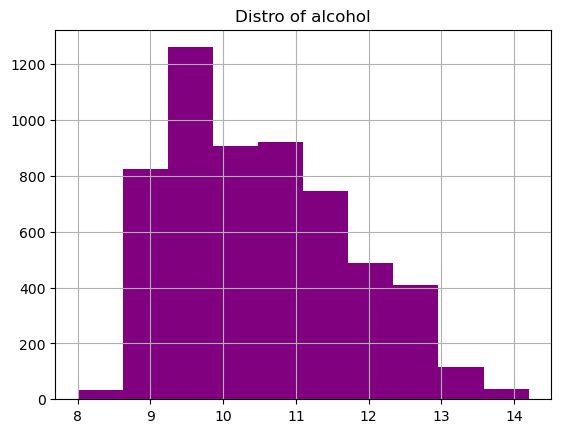

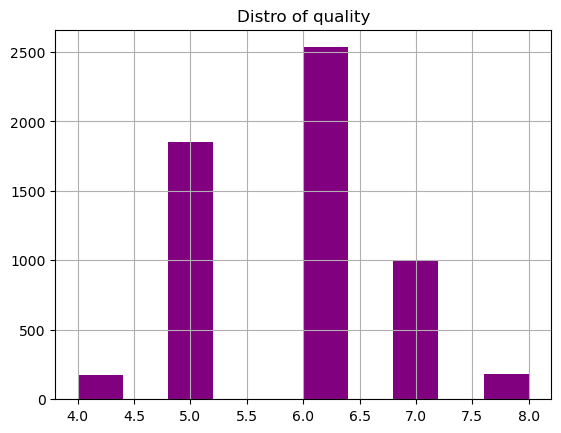

In [5]:
# plotting the numeric columns

num_cols = ['fixed_acidity', 'volatile_acidity', 'citric_acid', 'rs', 'chlorides', 'free_s02', 'total_s02', 'density', 'pH', 'sulphates', 'alcohol', 'quality']

for col in num_cols:
    
    plt.hist(wine[col], color = 'purple')
    plt.title(f'Distro of {col}')
    plt.grid()
    plt.show()

### Splitting the data into train, validate, test

In [6]:
train, val, test = prepare.train_val_test(wine, 'quality')
train.shape, val.shape, test.shape

((4017, 13), (1033, 13), (689, 13))

In [7]:
wine.corr()

,fixed_acidity,volatile_acidity,citric_acid,rs,chlorides,free_s02,total_s02,density,pH,sulphates,alcohol,quality,color_white
fixed_acidity,1.000000,0.184789,0.224927,-0.071021,0.357396,-0.216615,-0.224479,0.378508,-0.237732,0.182199,-0.120596,-0.097641,-0.393338
volatile_acidity,0.184789,1.000000,-0.438855,-0.188370,0.516304,-0.342204,-0.388926,0.224701,0.256112,0.213767,-0.033140,-0.230810,-0.646675
citric_acid,0.224927,-0.438855,1.000000,0.167138,-0.197575,0.199041,0.269549,0.025369,-0.282480,-0.035505,0.011051,0.090093,0.288709
rs,-0.071021,-0.188370,0.167138,1.000000,-0.108569,0.429072,0.498226,0.611893,-0.282931,-0.165980,-0.397263,-0.044747,0.330302
chlorides,0.357396,0.516304,-0.197575,-0.108569,1.000000,-0.260095,-0.341479,0.517553,0.240164,0.344114,-0.347254,-0.263200,-0.727149
free_s02,-0.216615,-0.342204,0.199041,0.429072,-0.260095,1.000000,0.711680,0.116603,-0.168395,-0.148631,-0.195179,0.067856,0.443179
total_s02,-0.224479,-0.388926,0.269549,0.498226,-0.341479,0.711680,1.000000,0.142080,-0.259219,-0.233621,-0.298677,-0.054430,0.666498
density,0.378508,0.224701,0.025369,0.611893,0.517553,0.116603,0.142080,1.000000,0.050104,0.213899,-0.756523,-0.325071,-0.326935
pH,-0.237732,0.256112,-0.282480,-0.282931,0.240164,-0.168395,-0.259219,0.050104,1.000000,0.306233,0.087432,0.027356,-0.381883
sulphates,0.182199,0.213767,-0.035505,-0.165980,0.344114,-0.148631,-0.233621,0.213899,0.306233,1.000000,0.004344,0.046815,-0.453758


### Scaling the data

In [8]:
# Scaling the data
scaler, train_scaled, val_scaled, test_scaled = prepare.scale_splits_rb(train, 
                                                                        val, 
                                                                        test, 
                                                                        return_scaler = True)  

> # Exploration
* Does density have an affect on the quality of wine?
* How does Sugar and Citric Acid affect the quality of wine? 
* Is the quality of wine effected by the amount of sulphites?
* Do sugar and density affect a wine's quality? 

### Question 1 Hypothesis:
* H_0 : The density of the wine has no relationship to its quality.
* H_a : The density of the wine has a relationship to its quality.

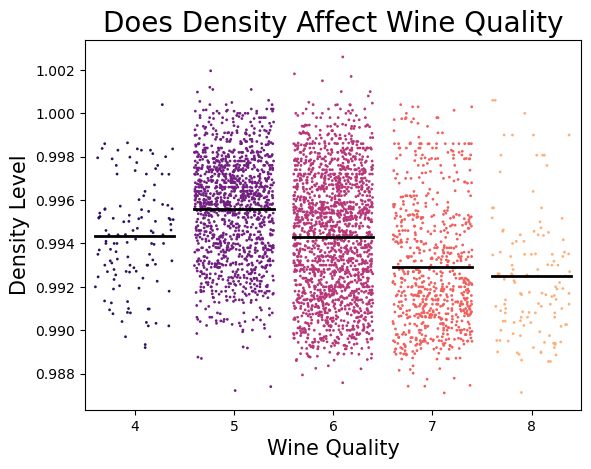

In [9]:
functions.density_quality(train)

> ## ***Takeaway:*** The lower the density, the better the wine

In [10]:
results1 = functions.t_test(train.quality, train.density)

362.8630437322157 0.0

We reject the null hypothesis as there is a
significant relationship between density and quality of wine.


># Clustering 

### Question 2 Hypothesis:
* H_0 : The levels of sugar and citric acid in the wine are independent of its quality.
* H_a : The levels of sugar and citric acid in the wine are dependent to its quality.

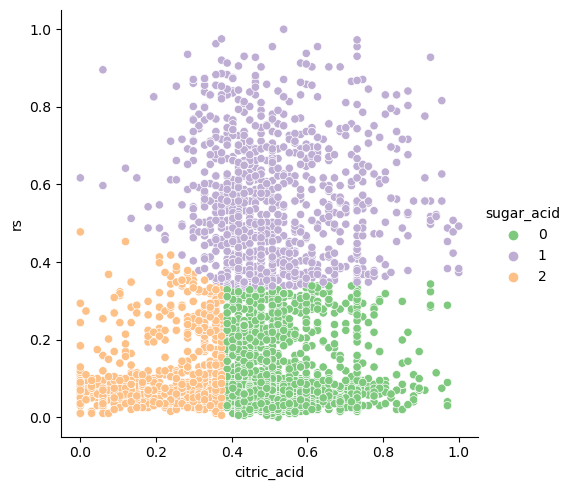

In [11]:
functions.cluster_sugar_acid(train_scaled)

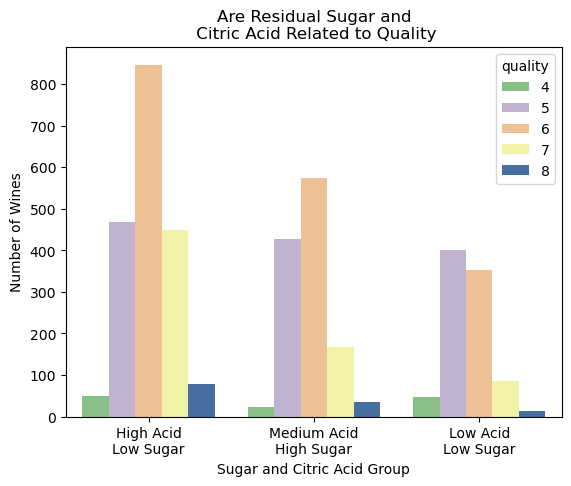

In [12]:
#plotting Sugar and Citric Acid feature against quality
functions.sugar_acid_compare(train_scaled)

In [13]:
sugar_acid_result = functions.chi_sq(train_scaled.quality, train_scaled.sugar_acid)

chi^2  = 203.9950
p-value = 0.0000


### Question 3 Hypothesis:
* H_0 : The overall quality of the wine has no relationship to the amount of sulphides present.
* H_a : The overall quality of the wine has a relationship to the amount of sulphides present.

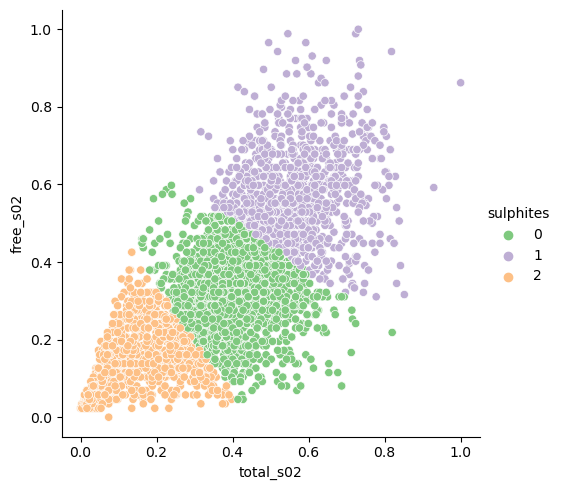

In [14]:
functions.cluster_sulphites(train_scaled)

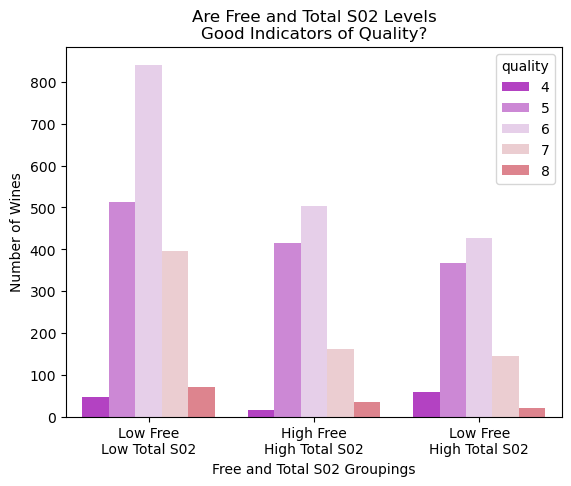

In [15]:
#plotting Free and Total S02 feature against quality
functions.sulphites_compare(train_scaled)

In [16]:
sulphites_result = functions.chi_sq(train_scaled.quality, train_scaled.sulphites)

chi^2  = 97.6935
p-value = 0.0000


### Question 4 Hypothesis:
* H_0 : The total residual sugar in and the density of the wine have no relationship to its quality.
* H_a : The total residual sugar in and the density of the wine have a relationship to its quality.

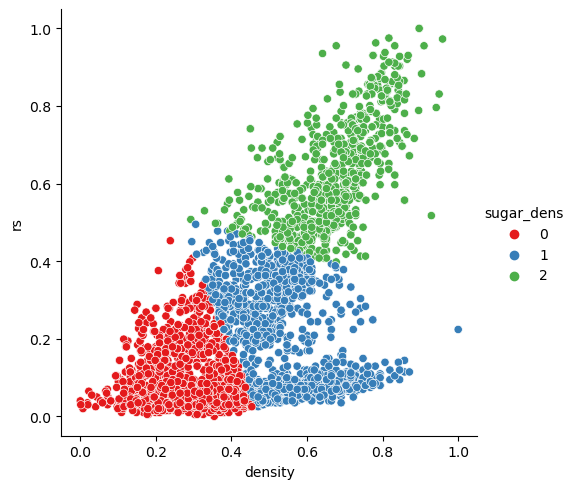

In [17]:
functions.cluster_sug_dens(train_scaled)

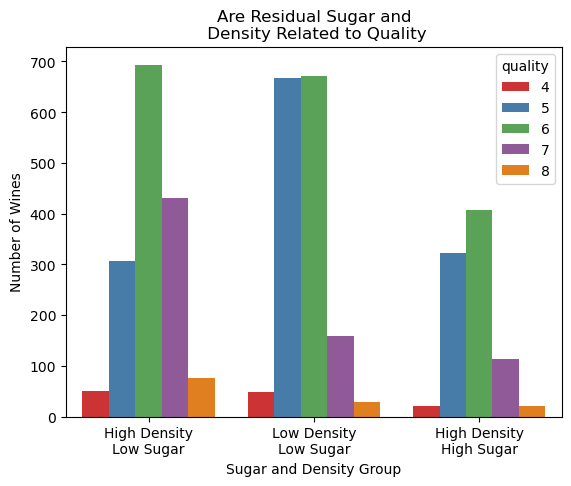

In [18]:
functions.sugar_dens_compare(train_scaled)

In [19]:
sugar_density_result = functions.chi_sq(train_scaled.quality, train_scaled.sugar_dens)

chi^2  = 312.2628
p-value = 0.0000


### Question 1 : Is overall quality of a given wine related to its free sulphur dioxide, total sulphur dioxide & sulphate levels ?

## OLS/Linear Regression

In [20]:
functions.density_ols(train_scaled)

The RMSE on the baseline of density against wine quality is 0.8488.
The RMSE for the OLS Linear Regression model was 0.8064.


## Clustering With K Means

In [ ]:
# dropping 'color' column to allow for modeling

train_scaled.drop(columns = 'color', inplace = True)

val_scaled.drop(columns = 'color', inplace = True)

test_scaled.drop(columns = 'color', inplace = True)

train_scaled.head(1)

In [ ]:
# # scaling the data

# mm_scaler = MinMaxScaler()

# train_scaled[['fixed_acidity', 'volatile_acidity', 
#        'citric_acid', 'rs', 'chlorides', 
#        'free_s02', 'total_s02', 'density',
#        'pH', 'sulphates', 'alcohol']] = mm_scaler.fit_transform(train_scaled[['fixed_acidity', 'volatile_acidity',
#                                                 'citric_acid', 'rs', 'chlorides', 
#                                                 'free_s02', 'total_s02', 'density', 
#                                                 'pH', 'sulphates', 'alcohol']])
# train_scaled.sample(3)

In [ ]:
# setting X for question 1 features : sulphur dioxide, total sulphur dioxide & sulphate levels

X_s02 = train_scaled[['free_s02','total_s02', 'sulphates']]

In [ ]:
# creating & setting KMeans to scaled data

kmeans = KMeans(n_clusters = 3, random_state = 23)

# fitting to X variable
kmeans.fit(X_s02)

# predicting to X variable
kmeans.predict(X_s02)

In [ ]:
# fitting KMeans scaler to the scaled train dataset

kmeans_scaled_s02 = KMeans(n_clusters = 3, random_state = 23)
kmeans_scaled_s02.fit(train_scaled[['free_s02','total_s02', 'sulphates']])

In [ ]:
# looking at the predicted array

kmeans_scaled_s02.predict(train_scaled[['free_s02','total_s02', 'sulphates']])

In [ ]:
# adding new column to train df with scaled data

train_scaled['scaled_clusters'] = kmeans_scaled_s02.predict(train_scaled[['free_s02','total_s02', 'sulphates']])

In [ ]:
# finding the inertia drop

kmeans_scaled_s02.inertia_

In [ ]:
# inertia loop

inertia = []
seed = 23

for i in range (1, 7):
    
    # clustering increments
    kmeans = KMeans(n_clusters = i, random_state = seed)
    
    kmeans.fit(train_scaled[['free_s02','total_s02', 'sulphates']])
    
    # append the inertia
    inertia.append(kmeans.inertia_)
    
inertia

In [ ]:
# creating a df for the s02 features

inertia_s02_df = pd.DataFrame({'n_clusters' : list(range(1,7)),
                               'inertia' : inertia})
inertia_s02_df

In [ ]:
train_scaled.head(1)

In [ ]:
# plotting for 3 features, sulphates & total S_02 against the clusters

sns.relplot(data = train_scaled, x = 'free_s02', y = 'total_s02', hue = 'scaled_clusters', palette = 'pastel')

plt.grid()
plt.show()

In [ ]:
# elbow of the better number of k

sns.relplot(data = inertia_s02_df, x = 'n_clusters', y = 'inertia', kind = 'line')
plt.grid()
plt.show()

**Takeaway : It appears that 2 is the best number of clusters.**

## Question 2 : Do the levels of citric acid and residual sugar in a wine have a relationship to its quality ?
## Using K-Means Clustering

In [ ]:
# setting X for question 2 features :  citric acid & residual sugar

X_cit_rs = train_scaled[['citric_acid', 'rs']]

In [ ]:
# fitting KMeans scaler to the scaled train dataset

kmeans_scaled_crs = KMeans(n_clusters = 4, random_state = 23)
kmeans_scaled_crs.fit(X_cit_rs)


In [ ]:
# looking at the predicted array

kmeans_scaled_crs.predict(X_cit_rs)

In [ ]:
# adding new column to train df with scaled data

train_scaled['scaled_clusters_cit_rs'] = kmeans_scaled_crs.predict(X_cit_rs)

In [ ]:
# finding the inertia drop

kmeans_scaled_crs.inertia_

In [ ]:
# inertia loop for citric acid & residual sugar

inertia = []
seed = 23

for i in range (1, 7):
    
    # clustering increments
    kmeans = KMeans(n_clusters = i, random_state = seed)
    
    kmeans.fit(X_cit_rs)
    
    # append the inertia
    inertia.append(kmeans.inertia_)
    
inertia

In [ ]:
# creating a df for the s02 features

inertia_crs_df = pd.DataFrame({'n_clusters' : list(range(1,7)),
                               'inertia' : inertia})
inertia_crs_df

In [ ]:
# plotting for 3 features, sulphates & total S_02 against the clusters

sns.relplot(data = train_scaled, x = 'citric_acid', y = 'rs', hue = 'scaled_clusters_cit_rs', palette = 'pastel')

plt.grid()


In [ ]:
# elbow of the better number of k

sns.relplot(data = inertia_crs_df, x = 'n_clusters', y = 'inertia', kind = 'line')
plt.grid()


**Takeaway : It appears that 2 is the best number of clusters.**


&nbsp;

# Classification, part I
## Using Decision Tree

In [ ]:
# splitting train, val, test into X and y

X_train, y_train, X_val, y_val, X_test, y_test = prepare_xy_split.tts_xy(train_scaled, 
                                                                         val_scaled, test_scaled, 'quality')

X_train.sample(3)

### Baseline for the Decision Tree model

In [ ]:
# transforming y_train, y_val into DFs to allow for modelling

y_train = pd.DataFrame(y_train)
y_val = pd.DataFrame(y_val)

# assuring that it worked
y_train.head(1)

In [ ]:
# determining the most common quality score

quality_baseline = train.quality.value_counts()
quality_baseline


**A quality score of 6 is the most common, with 1778 wines.**

In [ ]:
# setting the baseline for quality to 6

quality_baseline = (train_scaled['quality'] == 6).mean()

print(f'The baseline of about {round(quality_baseline, 4)} indicates ' + 
      'the likelihood that a wine will score a 6 for its quality rating.')

In [ ]:
# initialise the Decision Tree Classifier = clf

seed = 23

clf5 = DecisionTreeClassifier(max_depth = 11, random_state = seed)

In [ ]:
### fitting the model : 

clf5 = clf5.fit(X_train, y_train)

In [ ]:
# Examining accuracy of Decision Tree Classifier model

# allows for discrete with continuous 
from sklearn.multioutput import MultiOutputClassifier

clf5 = MultiOutputClassifier(clf5, n_jobs = -1)
clf5.fit(X_train, y_train)

In [ ]:
# accurcy of the decision tree model
print(f'Accuracy for Training Dataset, max depth of 5 : {round(clf5.score(X_train, y_train), 4)}')


**The accuracy of the Decision Tree Classifier with 11 branches is about 81.4pc.**  
**The baseline of about 44.26pc indicated the likelihood that a wine will score a 6 for its quality rating. From this, it is clear that the Decision Tree model is more accurate, by 37.14pc, than the baseline prediction.**

&nbsp;

# Classification, part II
## Using Random Forest

In [ ]:
from sklearn.ensemble import RandomForestClassifier

In [ ]:
random = RandomForestClassifier(max_depth = 11, random_state = 23,
                           max_samples = 0.5)        
                            # 50pc of all observations will be placed into each random sample

In [ ]:
random.fit(X_train, y_train)

# training the random forest on the data

In [ ]:
random.score(X_train, y_train)

# scoring the accuracy of the training set

# accurcy of the decision tree model
print(f'Accuracy for Validate Dataset, max depth of 11 : {round(random.score(X_train, y_train), 4)}')

In [ ]:
random.feature_importances_

# model is ranking in feature importance according to how helpful it is in making predictions

In [ ]:
# creating df of importance listing

test_important_df = pd.DataFrame({'feature': X_train.columns.tolist(),  # naming X_train features, sent to a list
                             'importance': random.feature_importances_}) 
                                  # matching the order of features in X_train to the importance

In [ ]:
# sorting important features

test_important_df.sort_values('importance', ascending = False).head(5)

**Takeaway : The Random Forest model with a maximum depth of 11 branches has an accuracy of 0.835 for the training dataset.  It indicates that the top three features in importance are 'alcohol', 'density' and 'volatile_acidity'.**

&nbsp;

**CLASSIFICATION TAKEAWAYS :**

**The Random Forest model with 11 branches had an accuracy rate of 83.5pc. The accuracy of the Decision Tree  with 11 branches was about 81.4pc. With an accuracy that is 2.1pc better than the Decision Tree model, the Random Forest wins out in the Classification modelling.**

**Both models are more accurate than the baseline prediction, with the Random Forest model at 11 branches, at an accuracy of 83.5pc, being 39.36pc more accurate than the baseline prediction of 44.14pc.**

&nbsp;

# Regression
## Question 3, part I : Does the density of a wine have a relationship to its quality ?  
### Object of least squares (OLS) on Linear Regression

In [ ]:
# getting mean of target variable

train_scaled['quality'].mean()

In [ ]:
# rounding and setting target variable name

baseline_preds = round(train_scaled['quality'].mean(), 3)

In [ ]:
# create a dataframe

predictions_df = train_scaled[['density', 'quality']]

In [ ]:
# MAKE NEW COLUMN ON DF FOR BASELINE PREDICTIONS

predictions_df['baseline_preds'] = baseline_preds
predictions_df.sample(3)

In [ ]:
# our linear regression model

ols_model = LinearRegression()

ols_model.fit(train_scaled[['density']], train_scaled[['quality']])

In [ ]:
# predicting on density after it's been fit

ols_model.predict(train_scaled[['density']])

# model predictions from above line of codes with 'yhat' as variable name and append it on to df
predictions_df['yhat'] = ols_model.predict(train_scaled[['density']])

predictions_df.head()

In [ ]:
# the residual column tells how far from the baseline we are from the actual

predictions_df['baseline_res'] = predictions_df['baseline_preds'] - predictions_df['quality'] 

predictions_df.head()

In [ ]:
## make a scatter plot

plt.scatter(x = predictions_df['density'], y = predictions_df['baseline_res'])

plt.xlabel('Density')
plt.ylabel('Baseline Residual')
plt.show()

In [ ]:
# looking at difference between yhat predictions and actual preds['mpg']

predictions_df['yhat_res'] = predictions_df['yhat'] - predictions_df['quality']
predictions_df.head(3)

In [ ]:
## make a scatter plot of the model's prediction minus the actual preditcion of mpg

plt.scatter(x = predictions_df['density'], y = predictions_df['yhat_res'])

plt.xlabel('Density')
plt.ylabel('Predictions Residual')
plt.show()

**Takeaway : The above graph shows that there is a consistent downslope for the residuals of predicted density as the density increases. As the density increases, the residual decreases, displaying the negative correlation.**

In [ ]:
# finding the RMSE in one step (x = original, y = prediction)

dens_qual_rmse = sqrt(mean_squared_error(predictions_df['quality'], predictions_df['baseline_preds']))
print(f'The RMSE baseline of density against wine quality is {round(dens_qual_rmse,4)}.')

In [ ]:
predictions_df.sample(3)

In [ ]:
# RMSE of linear regression model

OLS_rmse = mean_squared_error(predictions_df['yhat'], predictions_df['quality'], squared = False)

print(f'The RMSE for the OLS Linear Regression model was {round(OLS_rmse, 4)}.')


**The difference between the actual and the predicted quality score was 0.8064 for the OLS Linear Regression model. This means that the OLS model is 0.0423 more accurate than the baseline.**

&nbsp;

## Question 3, part II : Does the density of a wine have a relationship to its quality ?  
### General Linear Regression, Tweedie Regressor

In [ ]:
# plotting to look at the data

plt.hist(y_train)

Distribution appears normal.

In [ ]:
# y_t_flat = np.ravel(y_train)

In [ ]:
# normal distribution

tweedie = TweedieRegressor()

# fit the created object to training dataset

tweedie.fit(X_train, y_train)

In [ ]:
# then predict on X_train

predictions_df['tweedie'] = tweedie.predict(X_train)

predictions_df.head(3)

In [ ]:
# check the error against the baseline

tweedie_norm_rmse = sqrt(mean_squared_error(predictions_df['quality'], predictions_df['tweedie']))

print(f'The RMSE for the Tweedie Regressor model was {round(tweedie_norm_rmse, 4)}.')

**The difference between the actual and the predicted quality score was 0.83 for the Tweedie Regressor model.**

In [ ]:
# finding the error cf the baseline

base_rmse = sqrt(mean_squared_error(predictions_df['quality'], predictions_df['baseline_preds']))

print(f'The RMSE for the baseline prediction was {round(base_rmse, 4)}.')

**Takeaway : The Tweedie Regressor model is 0.0188 more accurate than the baseline, or a 1.88pc improvement on the baseline prediction.**

**REGRESSION MODELLING TAKEAWAYS :**  

**The Linear Regression OLS model, with an RMSE of 0.8064, was 0.0424 more accuate than the baseline (0.8488) on the train dataset. The Tweedie Regressor model on the train dataset, with an RMSE result of 0.83, was 0.0236 less accurate than Linear Regression OLS. Both models were more accurate than the baseline.**

&nbsp;

## Running The Top Models : OLS & TweedieRegressor

In [ ]:
## OLS 

# getting mean of target variable

val_scaled['quality'].mean()

In [ ]:
# rounding and setting target variable name

val_baseline_preds = round(val_scaled['quality'].mean(), 3)

# create a dataframe

val_predictions_df = val_scaled[['density', 'quality']]

In [ ]:
# MAKE NEW COLUMN ON DF FOR BASELINE PREDICTIONS

val_predictions_df['baseline_preds'] = val_baseline_preds
val_predictions_df.sample(3)


In [ ]:
# our linear regression model

ols_model = LinearRegression()

ols_model.fit(val_scaled[['density']], val_scaled[['quality']])

In [ ]:
# predicting on density after it's been fit

ols_model.predict(val_scaled[['density']])

In [ ]:
# model predictions from above line of codes with 'yhat' as variable name and append it on to df
val_predictions_df['yhat'] = ols_model.predict(val_scaled[['density']])

val_predictions_df.sample(3)

In [ ]:
# the residual column tells how far from the baseline we are from the actual

val_predictions_df['baseline_res'] = val_predictions_df['baseline_preds'] - val_predictions_df['quality'] 

val_predictions_df.sample(3)

In [ ]:
## make a scatter plot

plt.scatter(x = val_predictions_df['density'], y = val_predictions_df['baseline_res'])

plt.xlabel('Density')
plt.ylabel('Baseline Residual For Validation Dataset')
plt.show()

In [ ]:
# looking at difference between yhat predictions and actual preds['mpg']

val_predictions_df['yhat_res'] = val_predictions_df['yhat'] - val_predictions_df['quality']
val_predictions_df.head(3)

In [ ]:
## make a scatter plot of the model's prediction minus the actual preditcion of mpg

plt.scatter(x = val_predictions_df['density'], y = val_predictions_df['yhat_res'])

plt.xlabel('Density')
plt.ylabel('Predictions Residual')
plt.show()

**Takeaway : The above graph shows that, in the validate dataset, there is a consistent downslope for the residuals of predicted density as the density increases. As the density increases, the residual decreases, displaying the negative correlation.**

In [ ]:
# finding the RMSE in one step (x = original, y = prediction)

val_dens_qual_rmse = sqrt(mean_squared_error(val_predictions_df['quality'], val_predictions_df['baseline_preds']))
print(f'The RMSE of density against wine quality baseline is {round(val_dens_qual_rmse,4)}.')

In [ ]:
# RMSE of linear regression model

OLS_rmse = mean_squared_error(val_predictions_df['yhat'], val_predictions_df['quality'], squared = False)

print(f'The RMSE for the OLS Linear Regression model was {round(OLS_rmse, 4)}.')

**Takeaway :**  

**The RMSE of density against wine quality baseline was 0.8379 on the validate dataset. The RMSE for the OLS Linear Regression model was 0.7873 on the validate dataset.**  

**The difference on the validation dataset between the actual and the predicted quality score on the validation dataset was 0.0506 for the OLS Linear Regression model. This means that the OLS model on the validate dataset was 0.0506 more accurate than the baseline.**

## TweedieRegressor On The Validate Dataset

In [ ]:
# plotting to look at the data

plt.hist(y_val)

The data appears to be normally distributed.

In [ ]:
# normal distribution

tweedie_v = TweedieRegressor()

# fit the created object to training dataset

tweedie_v.fit(X_val, y_val)

In [ ]:
# then predict on X_train

val_predictions_df['tweedie'] = tweedie_v.predict(X_val)

val_predictions_df.sample(3)

In [ ]:
# check the error against the baseline

tweedie_norm_rmsev = sqrt(mean_squared_error(val_predictions_df['quality'], val_predictions_df['tweedie']))

print(f'The RMSE for the Tweedie Regressor model was {round(tweedie_norm_rmsev, 4)}.')

In [ ]:
# finding the error cf the baseline

base_rmsev = sqrt(mean_squared_error(val_predictions_df['quality'], val_predictions_df['baseline_preds']))

print(f'The RMSE for the baseline prediction was {round(base_rmsev, 4)}.')


**Takeaway : The RMSE for the Tweedie Regressor model was 0.8223 on the validate dataset. This is 0.0156 more accurate than the baseline RMSE.**
    


**VALIDATION DATASET REGRESSION MODELLING TAKEAWAYS :**  

**The Linear Regression model, with an RMSE of 0.7873, was 0.0615 more accuate than the baseline (RMSE 0.8379) for the validate dataset. The Tweedie Regressor model for the validate dataset was also more accurate than the baseline RMSE, but it was less accurate (RMSE 0.8223) than the Linear Regression model (RMSE 0.7873).**  

# Feature Selection Using SelectKBest and Recursive Feature Engineering 

## SelectKBest on features in the hypotheses

In [ ]:
# running selectKBest on hypotheses features

selectKBest_rfe_functions.select_best(train, ['total_s02', 'rs', 'citric_acid', 
                                              'density', 'free_s02'], 
                                              'quality', 2)

## RFE on features in the hypotheses

In [ ]:
selectKBest_rfe_functions.rfe_function(train, 3, 'quality', dummy_columns = ['color']).head(5).T


The RFE model indicates that chlorides, density and sulphates have the highest influence in predicting a given wine's quality rating.

**TAKEAWAY :** 

**SelectKBest indicates that the features 'citric_acid' and 'density' have the highest influence on the quality score of a given wine.  However, recursive feature elimination (RFE) indicates that the highest influencers on a given wine's quality score are 'chlorides', 'density' and 'sulphates'.**  

**From this, we can determine that further exploration, statistical testing and modelling needs to be done in order to truly determine quality influencers.**